In [71]:
import sympy as sp
sp.init_printing(use_latex=True)
import numpy as np
from matplotlib.pyplot import plot, loglog,legend
from functools import cache
def a(*args):
    return np.array(args)

In [2]:
P = np.array([
    [1/2,1/2],
    [1/2,-1/2],
    [-1/2,1/2],
    [-1/2,1/2]
])
y = np.array([
    [1/2,  0],
    [-1/2, 0]
])
n = 2

### Functions

In [13]:
sigma = .1
@np.vectorize
def h(x: np.ndarray):
    return np.exp(-np.linalg.norm(x)**2/(sigma**2))
def phi_(P: np.ndarray):
    return np.vectorize(lambda x : h(P-x))
phi = phi_(P)
def Phi_(P: np.ndarray):
    return np.vectorize(lambda X : sum(phi_(P)(X)))
Phi = Phi_(P) 
def f_(P: np.ndarray, y: np.ndarray):
    return np.vectorize(lambda X : np.linalg.norm(Phi_(P)(X) - y)**2 / 2)
f = f_(P,y)

### Derivatives

In [14]:
@np.vectorize
def D_h(x: np.ndarray):
    return -2/sigma**2*h(x)*x

In [68]:
def checkgradient(f,g,x0,v):
    ts = np.logspace(8,0,num=101)
    fx = f(x0)
    gx = g(x0)
    errs = [abs(f(x0 + t*v) - f(x0) - g(x0)*t) for t in ts]
    
    loglog(ts,errs, label="errors")
    loglog(ts,ts**2,label="parabola")
    legend()

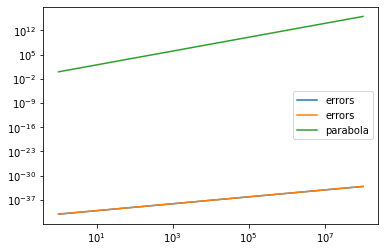

In [73]:
checkgradient(h,D_h,a(-1,-1),a(10,10))